In [26]:
from itertools import product
from collections import namedtuple
import pandas as pd 
import matplotlib.pyplot as plt

def tostr(i):
    return str(i)
def yieldstr(*args):
    for a in args:
        yield tostr(a)
def stringify(*args):
    return list(yieldstr(*args))
def cartesian(*lists):
    return list(product(*lists))
def substitute(vt,ts,inh):
    return f'{vt}_2estimators_{ts}testsize_{inh}inhibitors_randomforest_rmse_and_score.csv'
def df_mean(df, colname):
    return round(df[colname].mean(),4)

In [27]:
testsplits = stringify(30, 50,70,90,93,95,97,99)
vectypes = stringify('countvec')
inhs = stringify(3)
vectype_inh = cartesian(vectypes,inhs)
for v,i in vectype_inh:
    dc = pd.DataFrame(columns=['trainsize','avg_rmse','avg_score'])
    ind = 0 
    if i != '3':
        name = '{v}_{i}_inhibitors_randomforest_rmse_and_score.csv'.format(v=v,i=i)
        df = pd.read_csv(name)
        avg_rmse, avg_score = df_mean(df,'rmse'), df_mean(df,'score')
        dc.loc[ind] = [100-33, avg_rmse, avg_score]
        ind += 1

        
    for t in testsplits:
        name = substitute(v,t,i)
        df = pd.read_csv(name)
        avg_rmse, avg_score = df_mean(df,'rmse'), df_mean(df,'score')
        dc.loc[ind] = [100-int(t), avg_rmse, avg_score]
        ind += 1
    dcname = '{}_{}inhibitors_avgrmse_avgscores.csv'.format(v,i)
    dc.round(4).to_csv(dcname)
    print (dcname, dc)

countvec_3inhibitors_avgrmse_avgscores.csv    trainsize  avg_rmse  avg_score
0       70.0    0.1608     0.9965
1       50.0    0.1811     0.9956
2       30.0    0.2153     0.9938
3       10.0    0.3197     0.9863
4        7.0    0.3563     0.9831
5        5.0    0.3977     0.9788
6        3.0    0.4633     0.9714
7        1.0    0.6269     0.9473


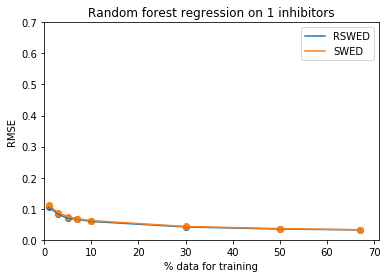

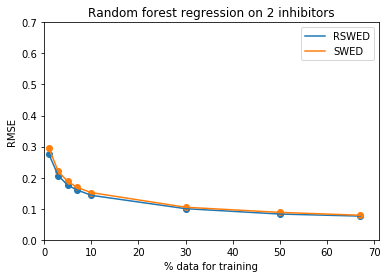

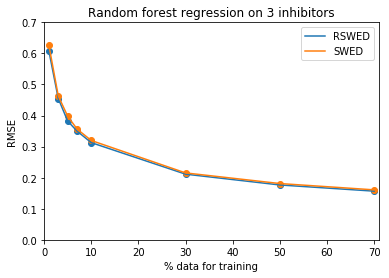

In [39]:
vectypes = stringify('distvec','countvec')
inhs = stringify(1,2,3)
for i in inhs:
        dfile = '{}_{}inhibitors_avgrmse_avgscores.csv'.format('distvec',i)
        cfile = '{}_{}inhibitors_avgrmse_avgscores.csv'.format('countvec',i)
        df = pd.read_csv(dfile)
        df = df[['trainsize','avg_rmse']]
        cf = pd.read_csv(cfile)
        cf = cf[['trainsize','avg_rmse']]
        assert all(df['trainsize']==cf['trainsize'])
        x_ = df['trainsize'].tolist()
        d_ = df['avg_rmse'].tolist()
        c_ = cf['avg_rmse'].tolist()
        axes = plt.gca()
        axes.set_xlim([-0.01,71])
        axes.set_ylim([0,0.7])
        plt.scatter(x_,d_)
        t1 = plt.plot(x_,d_)
        plt.scatter(x_,c_)
        t2 = plt.plot(x_,c_)
        plt.gca().legend(('RSWED','SWED'))
        plt.title("Random forest regression on {} inhibitors".format(i))
        plt.xlabel('% data for training')
        plt.ylabel('RMSE')
        plt.show()

[67.0, 50.0, 30.0, 10.0, 7.0, 5.0, 3.0, 1.0]